<h1><center><b>Supervised and Unsupervised Machine Learning</b></center></h1>
<h1><center><b>Heart Disease Prediction</b></center></h1>

##  **Define Problem and Set Objectives**
 The objective is to Predict Target Variable which represent if a patient has a heart disease or not, using a set of calssification algorithms include : Decision Tree , K - Nearest Neighbor , Support Vector Machine  , and Naive Bayesian. <br>  

The University of 
California, Irvine (UCI) Cleveland heart Disease dataset, which is clean data and contains 14 attributes the diagnosis
predicted target is includ also it has 303 instances, gathered in 1988 from Cleveland Clinic Foundation.

---

## **- Import the needed Python libraries**

In [1]:
import pandas as pd  # For Data Manipulation
import numpy as np   # For Scientific Computing
import matplotlib.pyplot as plt # For Data Visualization
import seaborn as sns # For Advanced Data Visualization 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score, f1_score , roc_curve, roc_auc_score ,silhouette_score,davies_bouldin_score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score

#importing pipeline
from sklearn.pipeline import Pipeline

#importing ensemble model
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier



---
## **- Load the Data Set**

In [2]:
Data = pd.read_csv("Heart_Disease .csv")

Data.head()

,age,sex,cp,tbp,chol,fbs,rstcg,thlch,exng,opeak,slope,ca,thal,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0


In [3]:
Data.info() # General Information about the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     303 non-null    int64  
 1   sex     303 non-null    int64  
 2   cp      303 non-null    int64  
 3   tbp     303 non-null    int64  
 4   chol    303 non-null    int64  
 5   fbs     303 non-null    int64  
 6   rstcg   303 non-null    int64  
 7   thlch   303 non-null    int64  
 8   exng    303 non-null    int64  
 9   opeak   303 non-null    float64
 10  slope   303 non-null    int64  
 11  ca      303 non-null    int64  
 12  thal    303 non-null    int64  
 13  Target  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Find the Shape ( rows , columns ) of the DataSet 
Data.shape
print("Number of Rows -->" , Data.shape[0])
print("Number of Columns -->" , Data.shape[1])

# Data Types
Data.dtypes


Number of Rows --> 303
Number of Columns --> 14


age         int64
sex         int64
cp          int64
tbp         int64
chol        int64
fbs         int64
rstcg       int64
thlch       int64
exng        int64
opeak     float64
slope       int64
ca          int64
thal        int64
Target      int64
dtype: object

---
## **- Data Preparation**
### - **Checking For Missing Values (Number of missing values in each variable)**


In [5]:
Data.isna().sum()

# For Proportions 
# Data.isna().sum() *100 / len(Data)

age       0
sex       0
cp        0
tbp       0
chol      0
fbs       0
rstcg     0
thlch     0
exng      0
opeak     0
slope     0
ca        0
thal      0
Target    0
dtype: int64


###  **- Cheking for Duplicated Records** 


In [6]:
## - Cheking for Duplicated Records 
Data.duplicated().sum()


0

<br><br>

---


## **- Basic Statistics Summary -- Univariate Analysis**

In [7]:
SubSet =Data[['age' ,'tbp', 'chol' , 'thlch' , 'opeak' ]]
SubSet.describe()


,age,tbp,chol,thlch,opeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [8]:
SubSet =Data[['sex' ,'cp', 'fbs' , 'rstcg' , 'exng' , 'slope' ,'ca' , 'thal' ]].astype('str')

SubSet.describe()


,sex,cp,fbs,rstcg,exng,slope,ca,thal
count,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,4,3
top,1,4,0,0,0,1,0,0
freq,206,144,258,151,204,142,180,168


---
## **- Correlation Anaylsis -- Bivariate Analysis**

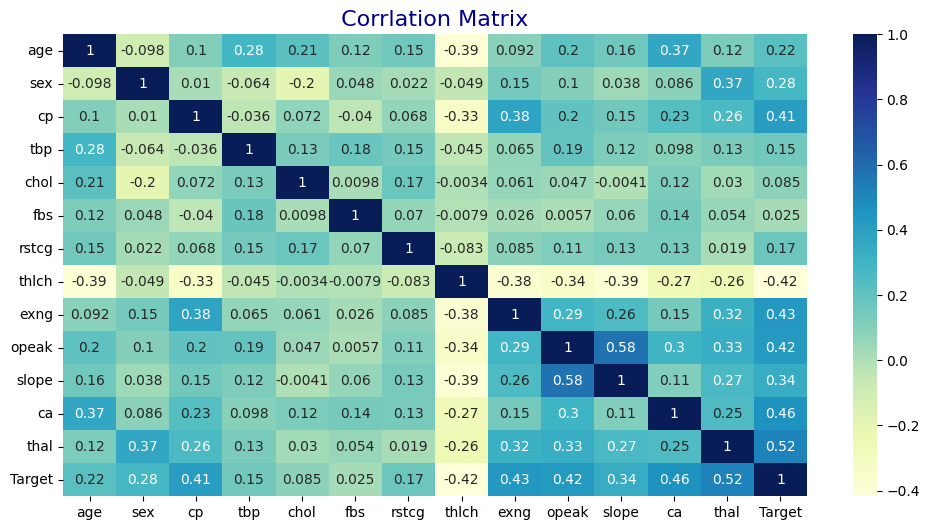

In [9]:
plt.figure(figsize =(12,6))
sns.heatmap(Data.corr() , annot = True, cmap ='YlGnBu')

plt.title(" Corrlation Matrix ", color = 'darkblue' , fontsize =16)
plt.show()

### **- Top 5 variable that correlated with target variable**

In [10]:
CorrMat = Data.corr()
CorrMat["Target"].sort_values(ascending = False).head(6)

Target    1.000000
thal      0.515894
ca        0.460033
exng      0.431894
opeak     0.424510
cp        0.414446
Name: Target, dtype: float64

---
# **Data Visualization**


## **- Pie Chart that show Gender ratio**


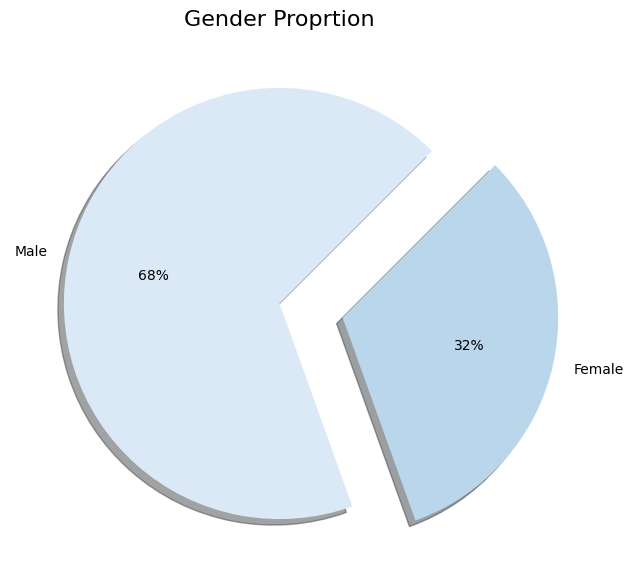

In [11]:
keys =['Male',  'Female']

Gender= Data['sex'].value_counts()

plt.figure(figsize= (10,7))
palette_color = sns.color_palette("Blues") 
plt.pie(Gender, labels=keys, autopct='%.0f%%',colors=palette_color , explode = [0,0.3] , shadow=True, startangle=45) 


plt.title("Gender Proprtion" , color = 'black' , fontsize =16)
plt.show()

---
## **- Data distribution based on output class.**

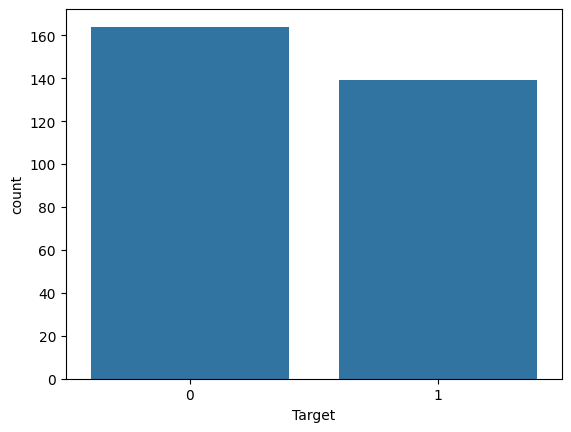

In [12]:
sns.countplot(data = Data , x = 'Target')
plt.show()

---
### **- Histogram That Show Age Distribution**



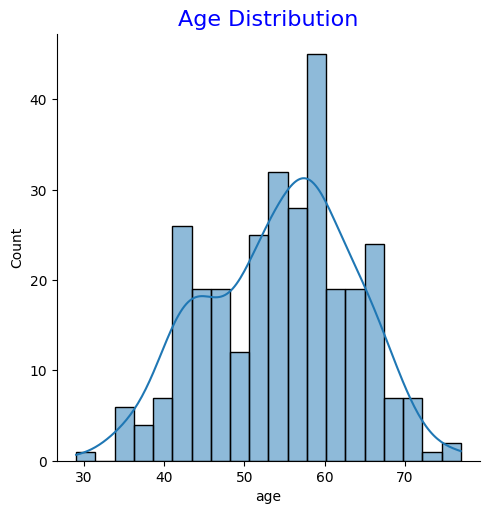

In [13]:
sns.displot(data =Data, x="age" , multiple="dodge" , bins = 20 , kde=True)
plt.title("Age Distribution" , color = 'blue', fontsize ='16')
plt.show()


---
### **- Line Chart that show The pressure of resting blood across different age**

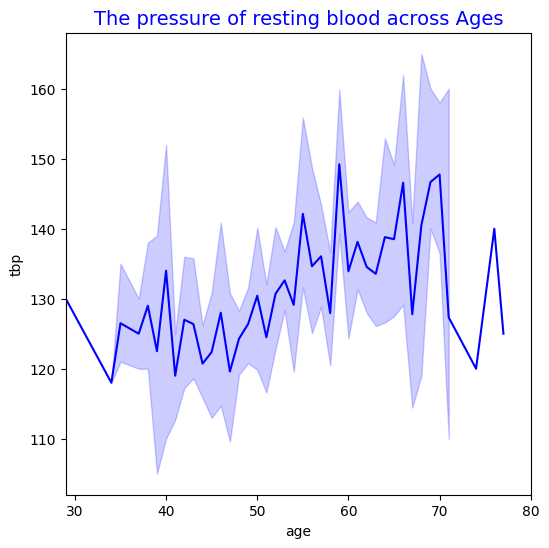

In [14]:
plt.figure(figsize = (6,6))
sns.lineplot(data = Data , x = 'age', y='tbp' , color ='blue')

plt.xticks(np.arange(20,81,10))
plt.xlim(29)

plt.title("The pressure of resting blood across Ages" , color = 'blue' , fontsize = 14)

plt.show()

---
## **- The pressure of resting blood Distribution**

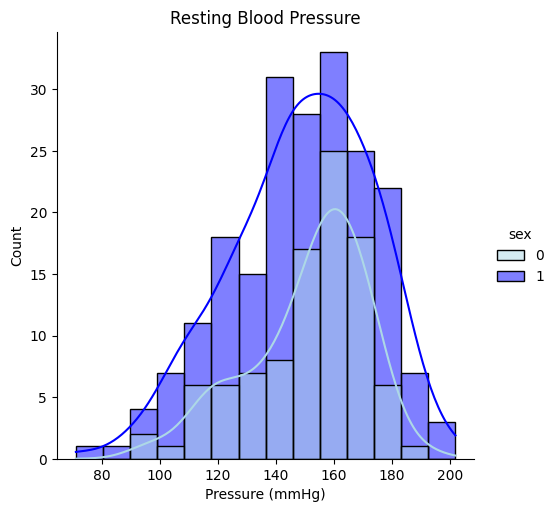

In [15]:
hue_colors = {1: 'blue', 0: 'lightblue'}

sns.displot(data=Data, x='thlch',  kde=True,  hue ='sex' , palette=hue_colors)
plt.title('Resting Blood Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')

plt.show()


---
## **- Serum of Cholesterol**

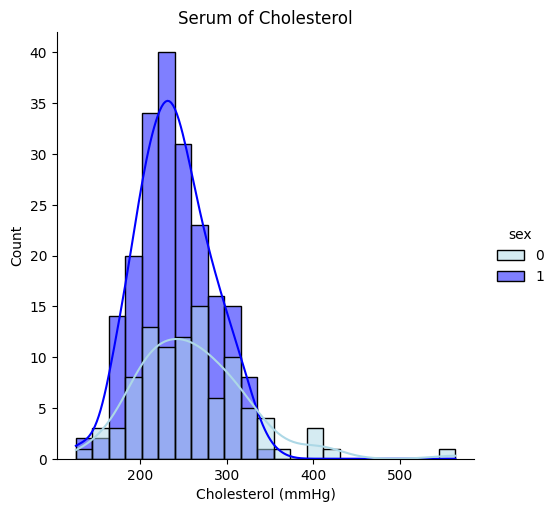

In [16]:
hue_colors = {1: 'blue', 0: 'lightblue'}
sns.displot(data=Data, x='chol',  kde=True, color='darkblue' , hue ='sex' , palette=hue_colors)

plt.title('Serum of Cholesterol')
plt.xlabel('Cholesterol (mmHg)')
plt.ylabel('Count')

plt.show()


---
### **- Line Chart that show Max Heart Rate across different age**

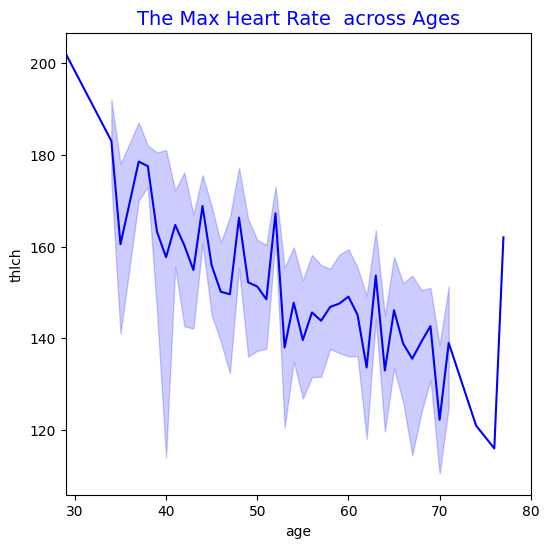

In [17]:
plt.figure(figsize = (6,6))
sns.lineplot(data = Data , x = 'age', y='thlch' , color ='blue')

plt.xticks(np.arange(20,81,10))
plt.xlim(29)

plt.title("The Max Heart Rate  across Ages" , color = 'blue' , fontsize = 14)

plt.show()

---
---
---
# **Model Development**
## **- Supervised Machine Learning algorithms**

In [18]:
# split the data into X and y
X = Data.drop('Target', axis=1)
y = Data['Target']


# List of all model to apply
models = [
    ('K-Neighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),  
    ('Support Vector Machine', SVC(random_state=42 , probability=True)),
    ('Nayev base Classifier', GaussianNB())
    
]

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


---
## **- Function to Plot Confision matrix for all Models**

In [19]:
def plot_confusion_matrix(y_test, y_pred ,  labels):
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels = labels)
    
    # Plot confusion matrix and ROC Curve 
    fig = plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

---
## **- Function to plot Receiver-operating-characteristic (ROC)**

In [20]:
def plot_ROC (fpr , tpr):
    Random = [0 for _ in range(len(y_test))]
    r_fpr , r_tpr , _ = roc_curve(y_test , Random)
    plt.plot(r_fpr , r_tpr ,linestyle = '--'  ,color = 'darkblue')
    plt.plot(fpr,tpr , linestyle = '--',color = 'lightblue')
    plt.title("ROC PLot")
    plt.xlabel("False Positive Rate")
    plt.xlabel("True Positive Rate")
    plt.show()

    

---
## **- Pipline to Develop models** 

-------------------------------------------------------------------------------------------------
Model K-Neighbors Classifier
Cross-Validation Scores: [0.64       0.68       0.70833333 0.58333333 0.66666667 0.54166667
 0.58333333 0.66666667 0.66666667 0.5       ]
Mean Accuracy: 0.6236666666666667
Test Accuracy:  0.6557377049180327
Classification Error:  0.34426229508196726
Precision: 0.7037037037037037
Recall: 0.59375
F1-score: 0.6440677966101694
Area Under the Curve: 0.7235991379310345



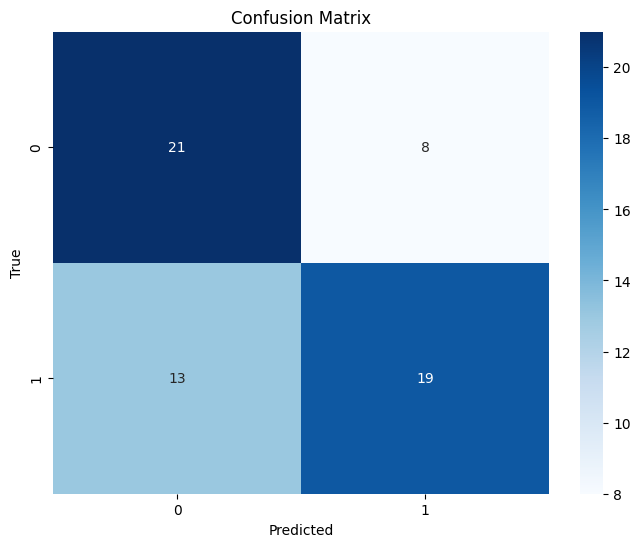

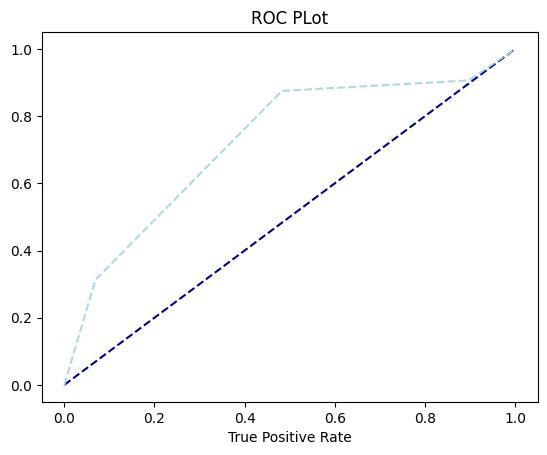


-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
Model Decision Tree Classifier
Cross-Validation Scores: [0.68       0.6        0.70833333 0.83333333 0.66666667 0.66666667
 0.79166667 0.625      0.75       0.83333333]
Mean Accuracy: 0.7155
Test Accuracy:  0.7540983606557377
Classification Error:  0.24590163934426235
Precision: 0.7741935483870968
Recall: 0.75
F1-score: 0.7619047619047619
Area Under the Curve: 0.7543103448275862



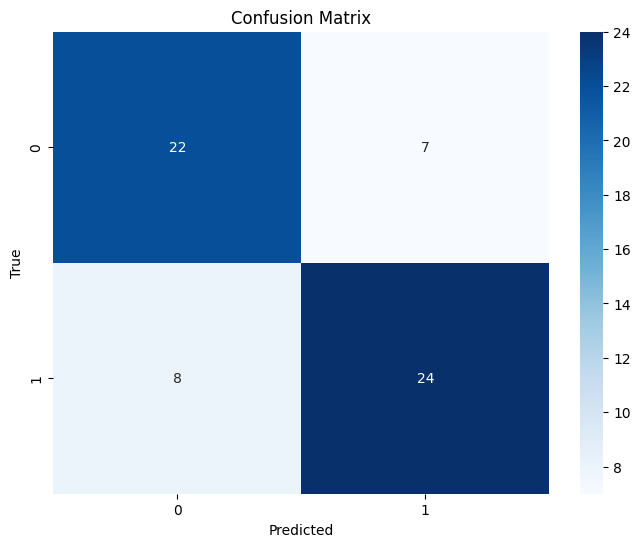

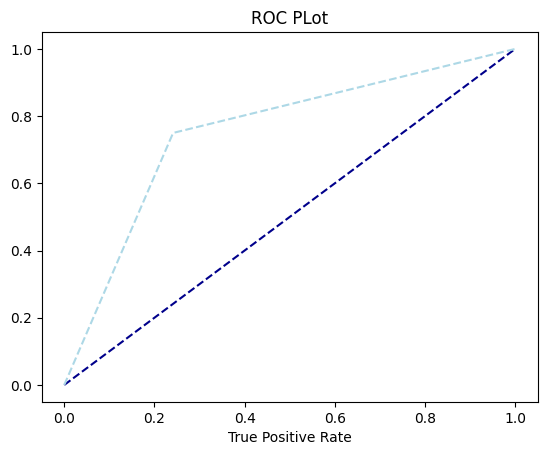


-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
Model Support Vector Machine
Cross-Validation Scores: [0.6        0.76       0.70833333 0.625      0.66666667 0.58333333
 0.54166667 0.66666667 0.625      0.54166667]
Mean Accuracy: 0.6318333333333334
Test Accuracy:  0.6721311475409836
Classification Error:  0.3278688524590164
Precision: 0.8333333333333334
Recall: 0.46875
F1-score: 0.6
Area Under the Curve: 0.769396551724138



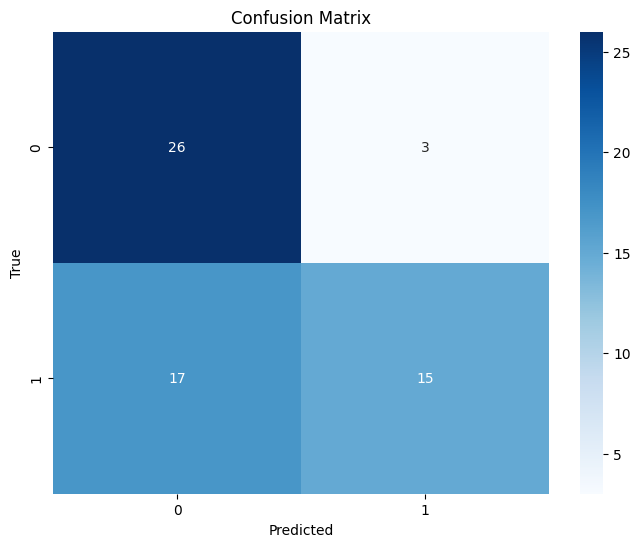

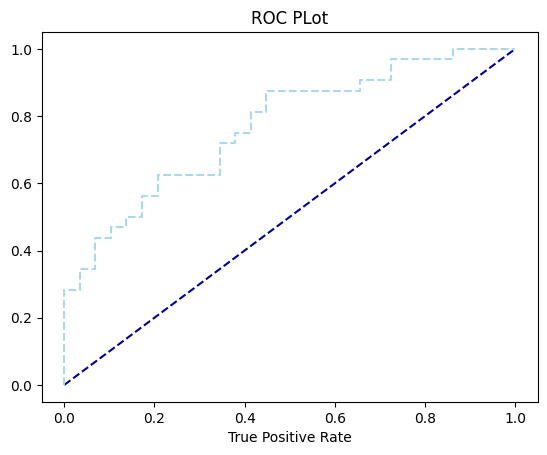


-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
Model Nayev base Classifier
Cross-Validation Scores: [0.76       0.84       0.875      0.83333333 0.875      0.625
 0.91666667 0.83333333 0.875      0.79166667]
Mean Accuracy: 0.8225
Test Accuracy:  0.8524590163934426
Classification Error:  0.14754098360655743
Precision: 0.896551724137931
Recall: 0.8125
F1-score: 0.8524590163934426
Area Under the Curve: 0.9170258620689654



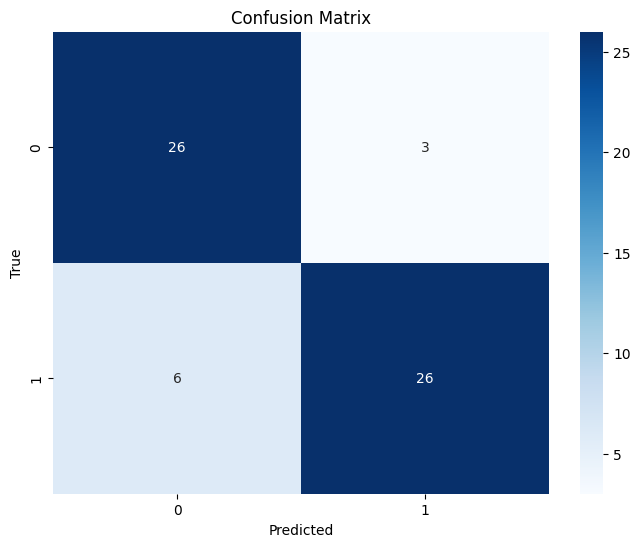

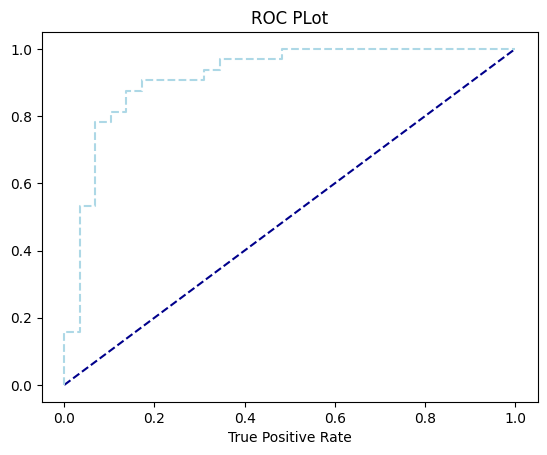


-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
Best Model:  Pipeline(steps=[('Model', GaussianNB())])


In [21]:

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline( [('Model', model) ])
       
    #fit the model
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    # Predict Probability for ROC 
    y_proba = model.predict_proba(X_test)
    y_proba = y_proba[: , 1]
    
    AUC = roc_auc_score(y_test , y_proba)
    fpr , tpr , _  = roc_curve(y_test , y_proba)

    # Cross Validation
    scores = cross_val_score(model, X_train, y_train, cv=10)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Precision
    precision = precision_score(y_test, y_pred)
    
    # Recall
    recall = recall_score(y_test, y_pred)
    
    # F1-score
    f1 = f1_score(y_test, y_pred)

    lables = [0, 1]

    print('-------------------------------------------------------------------------------------------------')
    
    #print the performance metrics
    print("Model", name)
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", scores.mean())
    print("Test Accuracy: ", accuracy)
    print("Classification Error: ", 1-accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Area Under the Curve:" , AUC)
    print()
    

    
    plot_confusion_matrix(y_test, y_pred, lables)
    plot_ROC(fpr, tpr )
    print()
    
    print('-------------------------------------------------------------------------------------------------')


    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = pipeline

print('-------------------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------------------')

# Retrieve the best model
print("Best Model: ", best_model)
    


---
# **Ensemble Learning**

-------------------------------------------------------------------------------------------------
Ensemble Model from Best Models:


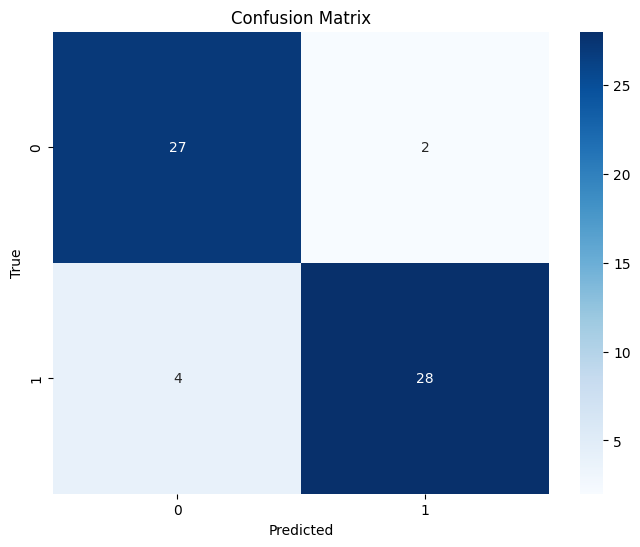

-------------------------------------------------------------------------------------------------
Test Accuracy:  0.9016393442622951
Classification Error:  0.09836065573770492
Precision: 0.9333333333333333
Recall: 0.875
F1-score: 0.9032258064516129

-------------------------------------------------------------------------------------------------
Ensemble Model from Weak Models:


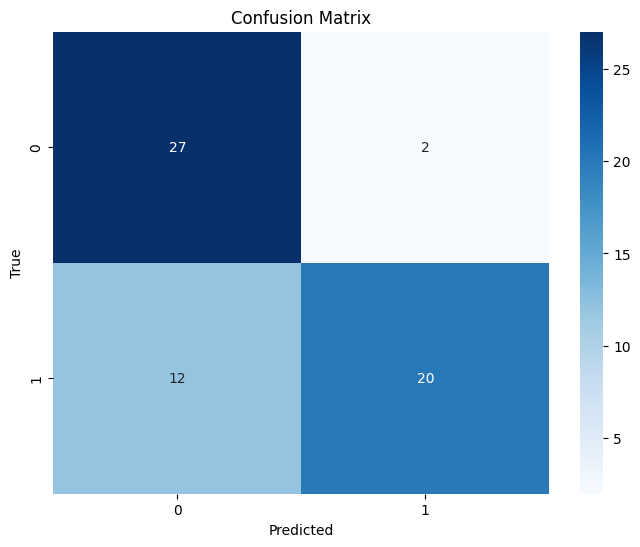

-------------------------------------------------------------------------------------------------
Test Accuracy:  0.7704918032786885
Classification Error:  0.2295081967213115
Precision: 0.9090909090909091
Recall: 0.625
F1-score: 0.7407407407407407


In [22]:

# Ensemble model from best models
best_models = [
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    SVC(random_state=42)
]

# Ensemble model from Weak models
Weak_models = [
    SVC(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42)
]

# Split your training data
X_train_subsets = []
y_train_subsets = []

for _ in range(3):  # Create 3 subsets
    X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=0.7, random_state=42)
    X_train_subsets.append(X_subset)
    y_train_subsets.append(y_subset)

# Train each model on a subset
best_ensemble_models = []
for i, model in enumerate(best_models):
    bagged_model = BaggingClassifier(estimator=model, n_estimators=5, random_state=42)
    bagged_model.fit(X_train_subsets[i], y_train_subsets[i])
    best_ensemble_models.append(bagged_model)

# Train each model on a subset
Weak_ensemble_models = []
for i, model in enumerate(Weak_models):
    bagged_model = BaggingClassifier(estimator=model, n_estimators=5, random_state=42)
    bagged_model.fit(X_train_subsets[i], y_train_subsets[i])
    Weak_ensemble_models.append(bagged_model)


# Combine predictions
best_ensemble_predictions = np.zeros((len(X_test), 3))

for i, model in enumerate(best_ensemble_models):
    best_ensemble_predictions[:, i] = model.predict(X_test)
    best_ensemble_predictions_mean = np.mean(best_ensemble_predictions, axis=1)

# Combine predictions
Weak_ensemble_predictions = np.zeros((len(X_test), 3))

for i, model in enumerate(Weak_ensemble_models):
    Weak_ensemble_predictions[:, i] = model.predict(X_test)
    Weak_ensemble_predictions_mean = np.mean(Weak_ensemble_predictions, axis=1)


print('-------------------------------------------------------------------------------------------------')

print("Ensemble Model from Best Models:")
plot_confusion_matrix(y_test, best_ensemble_predictions_mean.round(), lables)

accuracy = accuracy_score(y_test, best_ensemble_predictions_mean.round())
# Precision
precision = precision_score(y_test,best_ensemble_predictions_mean.round())  
# Recall
recall = recall_score(y_test,best_ensemble_predictions_mean.round()) 
# F1-score
f1 = f1_score(y_test, best_ensemble_predictions_mean.round())

print('-------------------------------------------------------------------------------------------------')
    
#print the performance metrics
print("Test Accuracy: ", accuracy)
print("Classification Error: ", 1-accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print()

print('-------------------------------------------------------------------------------------------------')

print("Ensemble Model from Weak Models:")

plot_confusion_matrix(y_test, Weak_ensemble_predictions_mean.round(), lables)

accuracy = accuracy_score(y_test, Weak_ensemble_predictions_mean.round())
# Precision
precision = precision_score(y_test,Weak_ensemble_predictions_mean.round())  
# Recall
recall = recall_score(y_test, Weak_ensemble_predictions_mean.round()) 
# F1-score
f1 = f1_score(y_test, Weak_ensemble_predictions_mean.round())

print('-------------------------------------------------------------------------------------------------')
    
#print the performance metrics
print("Test Accuracy: ", accuracy)
print("Classification Error: ", 1-accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)






---
---

# **K-Means algorithm to identify possible groups among heart disease patients.**

In [23]:
CData = Data.drop(['Target'], axis=1)


## **- Optimise Function to Choose the best number of cluster**

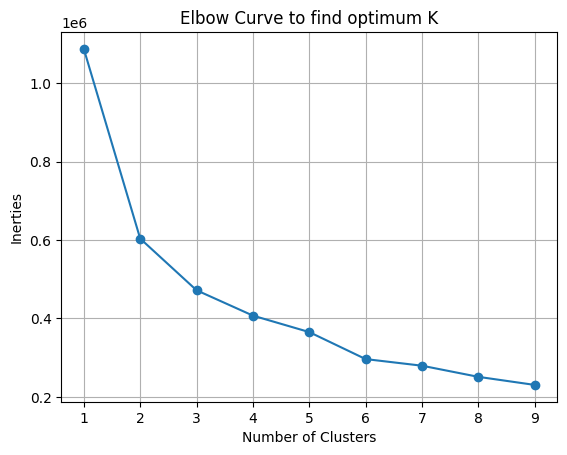

In [24]:
def Optimise_KMean(cdata, k_max):
    means = []
    inertias= []
    for k in range (1, k_max):
        Kmeans = KMeans(n_clusters =k) 
        Kmeans.fit(CData)
        means.append(k)
        inertias.append(Kmeans.inertia_)
    # Generate an Elbow plot 
    plt.plot(means , inertias , 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inerties")
    plt.grid(True)
    plt.title('Elbow Curve to find optimum K')
    plt.show()

Optimise_KMean(CData , 10)

## **- KMeans Development**

In [25]:
Kmeans  = KMeans(n_clusters = 3)
Kmeans.fit(CData)

KMeans(n_clusters=3)

## **- Creating a new column that accurately describes the cluster datapoint belonging to.**

In [26]:
CData['KMeans_label']  = Kmeans.labels_

In [27]:
CData.head()


,age,sex,cp,tbp,chol,fbs,rstcg,thlch,exng,opeak,slope,ca,thal,KMeans_label
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,2
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,2
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,2
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,2


## **- Let’s just take any two of the features and plot to see how the observations are clustered.**

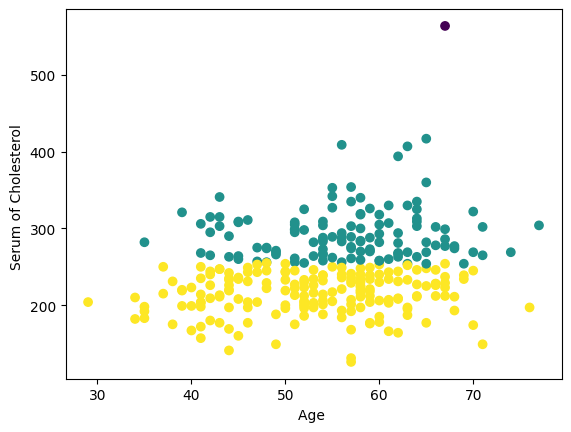

In [28]:
plt.scatter(x= CData['age'] , y = CData['chol'] , c = CData['KMeans_label']) 
plt.xlabel("Age ")
plt.ylabel("Serum of Cholesterol ")
plt.show()

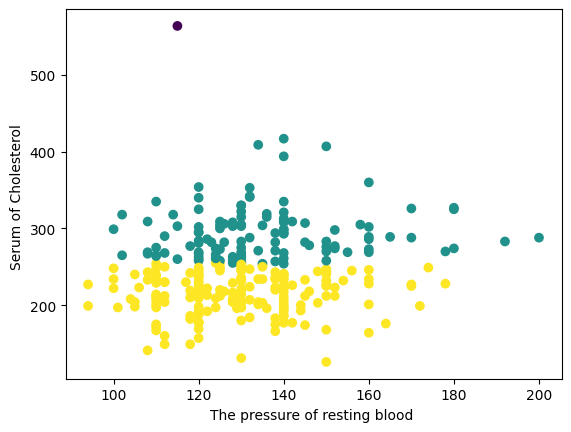

In [29]:
plt.scatter(x= CData['tbp'] , y = CData['chol'] , c = CData['KMeans_label']) 
plt.xlabel("The pressure of resting blood ")
plt.ylabel("Serum of Cholesterol ")
plt.show()

## **- Clustring Evalation**

In [30]:
silhouette_avg = silhouette_score(CData, Kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.3778626321669238


In [31]:
davies_bouldin = davies_bouldin_score(CData, Kmeans.labels_)
print("Davies-Bouldin Index:", davies_bouldin)

Davies-Bouldin Index: 0.7032343739268244


---
---
---
# Author
## **Mones Nazih Ksasbeh**